# Library Gate Counts

#### How does the semester schedule line up with traffic through Jackson Library?

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
%matplotlib inline

In [12]:
# The LibraryGateCounts.csv file has gate counts for spring 2017
gateCounts = pd.read_csv(r'../data/LibraryGateCounts.csv')
gateCounts['Date'] = gateCounts['Date'].apply(pd.to_datetime)

- The gate counts are taken twice a day, once at open and once at close.
- Jackson Library: College Avenue entrance (CLG)
- Jackson Library: EUC Connector entrance (CON)

A gate number increases by one if a person regardless of the direction traveled. The calculation below is based upon the average of the differences between the numbers at open and at close.



In [13]:
gateCounts['Patrons'] =\
((gateCounts['CLG-CLOSE'] - gateCounts['CLG-OPEN']) + (gateCounts['CON-CLOSE'] - gateCounts['CON-OPEN']))/2


In [14]:
# map colors to days 

dayColors = [
    'red',
    'orange',
    'yellow',
    'green',
    'blue',
    'indigo',
    'violet'
    ]
#Rotating the colors to get the rainbow to appear correctly.
dayColors = dayColors[5:]+ dayColors[:5]

Some interesting correlations to the visuals below:
- 01/17/17: Classes begin
- 03/11/17: Spring Break begins
- 03/20/17: Spring Break ends
- 05/03/17: Reading day
- 05/04/17: Finals start
- 05/12/17: Commencement

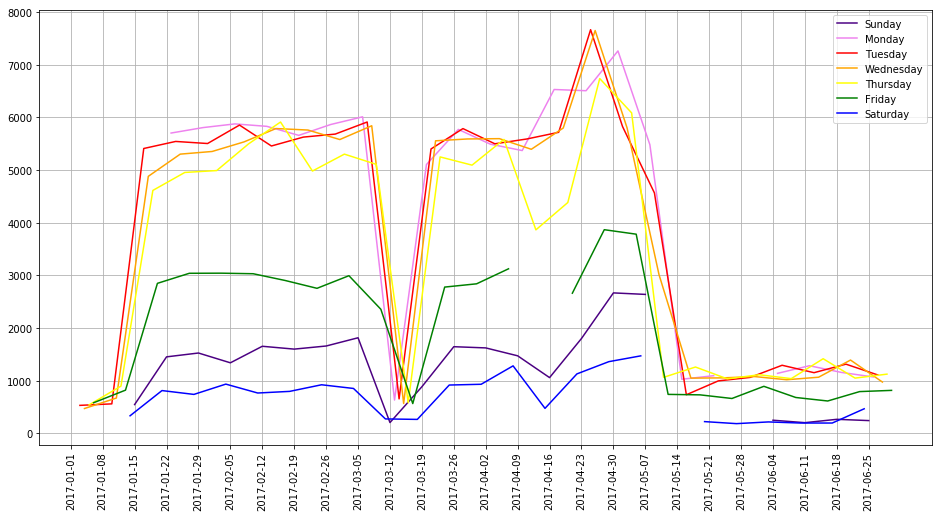

In [15]:
plt.figure(figsize=(16,8))
plt.grid(b=True)
plt.xticks(gateCounts.index.values[::7], gateCounts.Date.dt.strftime("%Y-%m-%d")[::7], rotation=90)
for i in range(7):
    plt.plot(gateCounts.index.values[i::7],gateCounts['Patrons'][i::7].values,\
                c=dayColors[i],\
                label=calendar.day_name[gateCounts.iloc[i,0].weekday()]);
plt.legend();